In [8]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LassoCV
# from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error #MSE

In [9]:

patients.head()

病人ID      性别  年龄  糖尿病史  高血压史  肺部疾病史  体重  家庭成员数量  医疗资源  发病时期  生存时长
0     1    male  68     1     1      0  54       4     3     3    30
1     2  female  66     0     1      0  88       1     1     1     9
2     3    male  32     0     0      0  86       5     2     3    44
3     4  female  51     1     1      0  73       0     2     2    21
4     5    male  57     0     0      0  69       6     2     3    43

### 1. 数据处理

In [10]:
import seaborn as sns

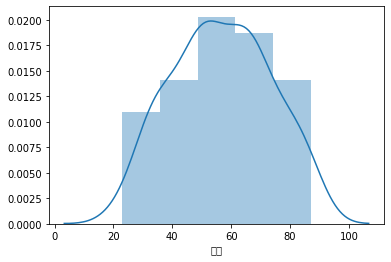

In [11]:
# 年龄distribution


In [12]:
# 定义年龄分箱函数


In [13]:
patients['年龄段'] =
patients.head()

病人ID      性别  糖尿病史  高血压史  肺部疾病史  体重  家庭成员数量  医疗资源  发病时期  生存时长  年龄段
0     1    male     1     1      0  54       4     3     3    30   老年
1     2  female     0     1      0  88       1     1     1     9   老年
2     3    male     0     0      0  86       5     2     3    44   年轻
3     4  female     1     1      0  73       0     2     2    21  中老年
4     5    male     0     0      0  69       6     2     3    43  中老年

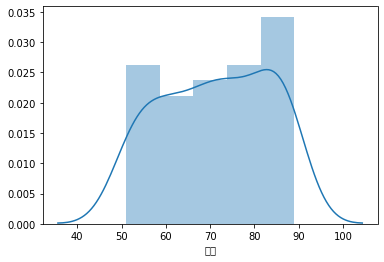

In [14]:
# 体重分布图


In [15]:
# 使用分箱函数对体重分箱
patients['胖瘦'] = 
patients.head()

病人ID      性别  糖尿病史  高血压史  肺部疾病史  家庭成员数量  医疗资源  发病时期  生存时长  年龄段  胖瘦
0     1    male     1     1      0       4     3     3    30   老年  偏瘦
1     2  female     0     1      0       1     1     1     9   老年  肥胖
2     3    male     0     0      0       5     2     3    44   年轻  肥胖
3     4  female     1     1      0       0     2     2    21  中老年  偏胖
4     5    male     0     0      0       6     2     3    43  中老年  中等

In [16]:
# 定义家庭规模列
patients['家庭规模'] = 
patients.head()

病人ID      性别  糖尿病史  高血压史  肺部疾病史  医疗资源  发病时期  生存时长  年龄段  胖瘦  家庭规模
0     1    male     1     1      0     3     3    30   老年  偏瘦     1
1     2  female     0     1      0     1     1     9   老年  肥胖     1
2     3    male     0     0      0     2     3    44   年轻  肥胖     1
3     4  female     1     1      0     2     2    21  中老年  偏胖     0
4     5    male     0     0      0     2     3    43  中老年  中等     1

In [20]:
# 定义函数或编写循环对离散特征进行读热编码

patients.head()

病人ID  糖尿病史  高血压史  肺部疾病史  生存时长  性别_female  性别_male  年龄段_中年  年龄段_中老年  年龄段_年轻  \
0     1     1     1      0    30          0        1       0        0       0   
1     2     0     1      0     9          1        0       0        0       0   
2     3     0     0      0    44          0        1       0        0       1   
3     4     1     1      0    21          1        0       0        1       0   
4     5     0     0      0    43          0        1       0        1       0   

   ...  胖瘦_偏胖  胖瘦_肥胖  家庭规模_0  家庭规模_1  医疗资源_1  医疗资源_2  医疗资源_3  发病时期_1  发病时期_2  \
0  ...      0      0       0       1       0       0       1       0       0   
1  ...      0      1       0       1       1       0       0       1       0   
2  ...      0      1       0       1       0       1       0       0       0   
3  ...      1      0       1       0       0       1       0       0       1   
4  ...      0      0       0       1       0       1       0       0       0   

   发病时期_3  
0       1  
1       0  
2       1  
3       0  
4       1  

[5 rows x 23 columns]

In [21]:
patients.columns

Index(['病人ID', '糖尿病史', '高血压史', '肺部疾病史', '生存时长', '性别_female', '性别_male',
       '年龄段_中年', '年龄段_中老年', '年龄段_年轻', '年龄段_老年', '胖瘦_偏瘦', '胖瘦_中等', '胖瘦_偏胖',
       '胖瘦_肥胖', '家庭规模_0', '家庭规模_1', '医疗资源_1', '医疗资源_2', '医疗资源_3', '发病时期_1',
       '发病时期_2', '发病时期_3'],
      dtype='object')

In [22]:
x_col = [x for x in patients.columns if x not in ['病人ID','生存时长']]

In [23]:
# 特征部分
X = 
# 标签部分
y = 

In [24]:
X.head()

糖尿病史  高血压史  肺部疾病史  性别_female  性别_male  年龄段_中年  年龄段_中老年  年龄段_年轻  年龄段_老年  \
0     1     1      0          0        1       0        0       0       1   
1     0     1      0          1        0       0        0       0       1   
2     0     0      0          0        1       0        0       1       0   
3     1     1      0          1        0       0        1       0       0   
4     0     0      0          0        1       0        1       0       0   

   胖瘦_偏瘦  ...  胖瘦_偏胖  胖瘦_肥胖  家庭规模_0  家庭规模_1  医疗资源_1  医疗资源_2  医疗资源_3  发病时期_1  \
0      1  ...      0      0       0       1       0       0       1       0   
1      0  ...      0      1       0       1       1       0       0       1   
2      0  ...      0      1       0       1       0       1       0       0   
3      0  ...      1      0       1       0       0       1       0       0   
4      0  ...      0      0       0       1       0       1       0       0   

   发病时期_2  发病时期_3  
0       0       1  
1       0       0  
2       0       1  
3       1       0  
4       0       1  

[5 rows x 21 columns]

In [25]:
# 切分数据集


In [26]:
# 初始化一个回归模型

# 用模型去拟合训练数据

# 模型对测试集预测

# 检验结果
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))

In [27]:
y_test

83    29
53    21
70    31
45    35
44    41
39    35
22    32
80    37
10     4
0     30
18    46
30    37
73    42
33    29
90    40
4     43
76    44
77    31
12    47
31    33
Name: 生存时长, dtype: int64

In [28]:
y_pred

array([29.70107498, 22.44770201, 29.8732601 , 34.96202701, 42.20822737,
       31.49892383, 32.02594974, 34.61147612, -0.70483208, 28.46472659,
       47.20846094, 34.61147612, 40.628716  , 29.70107498, 38.45118361,
       44.2192956 , 47.12085836, 29.84120491, 47.20846094, 30.9168367 ])

In [29]:
print(RMSE)

1.9578350433630867
